In [9]:
import numpy as np

In [10]:
pip install scikit-learn scipy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.datasets import fetch_lfw_people

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [14]:
#Extract the meaningful parameters of the faces dataset
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

In [15]:
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

In [16]:
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [17]:
#It is important in machine learning to split the data accordingly into training and testing sets to
#avoid contamination of the model. Ideally, you should also have a validation set.
# Split into a training set and a test set using a stratified k fold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

In [19]:
#Compute the PCA via eigen-decomposition of the data matrix X after the mean of the training set
#is removed. This results in a model with variations from the mean. We also transform the training and
#testing data into ’face space’, i.e. the learned sub space of the eigen-faces.



In [20]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [21]:
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


In [22]:
# Finally, plot the resulting eigen-vectors of the face PCA model, AKA the eigenfaces
import matplotlib.pyplot as plt

In [23]:
# Qualitative evaluation of the predictions using matplotlib

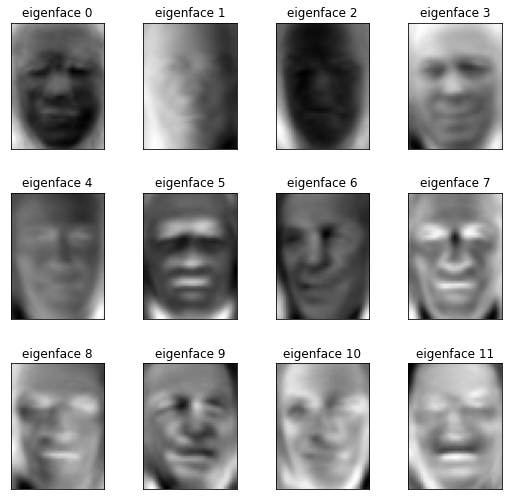

In [24]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()